# 1.1
Создайте класс по работе с тригонометрическими функциями. В классе
должны быть реализованы функции вычисления:
− косинуса;
− синуса;
− тангенса;
− арксинуса;
− арккосинуса;
− арктангенса;
− перевода из градусов в радианы

In [1]:
import math

class Trigonometry:
    """Класс для выполнения тригонометрических вычислений"""
    
    @staticmethod
    def to_radians(degrees):
        """
        Переводит градусы в радианы
        
        Параметры:
        degrees (float): угол в градусах
        
        Возвращает:
        float: угол в радианах
        """
        return math.radians(degrees)
    
    @staticmethod
    def to_degrees(radians):
        """
        Переводит радианы в градусы
        
        Параметры:
        radians (float): угол в радианах
        
        Возвращает:
        float: угол в градусах
        """
        return math.degrees(radians)
    
    @staticmethod
    def cos(x, use_degrees=False):
        """
        Вычисляет косинус угла
        
        Параметры:
        x (float): угол
        use_degrees (bool): True, если угол задан в градусах, False - в радианах
        
        Возвращает:
        float: значение косинуса
        """
        if use_degrees:
            x = math.radians(x)
        return math.cos(x)
    
    @staticmethod
    def sin(x, use_degrees=False):
        """
        Вычисляет синус угла
        
        Параметры:
        x (float): угол
        use_degrees (bool): True, если угол задан в градусах, False - в радианах
        
        Возвращает:
        float: значение синуса
        """
        if use_degrees:
            x = math.radians(x)
        return math.sin(x)
    
    @staticmethod
    def tan(x, use_degrees=False):
        """
        Вычисляет тангенс угла
        
        Параметры:
        x (float): угол
        use_degrees (bool): True, если угол задан в градусах, False - в радианах
        
        Возвращает:
        float: значение тангенса
        """
        if use_degrees:
            x = math.radians(x)
        return math.tan(x)
    
    @staticmethod
    def asin(x):
        """
        Вычисляет арксинус числа
        
        Параметры:
        x (float): значение в диапазоне [-1, 1]
        
        Возвращает:
        float: угол в радианах
        
        Вызывает ValueError, если x вне диапазона [-1, 1]
        """
        if x < -1 or x > 1:
            raise ValueError("Аргумент арксинуса должен быть в диапазоне [-1, 1]")
        return math.asin(x)
    
    @staticmethod
    def acos(x):
        """
        Вычисляет арккосинус числа
        
        Параметры:
        x (float): значение в диапазоне [-1, 1]
        
        Возвращает:
        float: угол в радианах
        
        Вызывает ValueError, если x вне диапазона [-1, 1]
        """
        if x < -1 or x > 1:
            raise ValueError("Аргумент арккосинуса должен быть в диапазоне [-1, 1]")
        return math.acos(x)
    
    @staticmethod
    def atan(x):
        """
        Вычисляет арктангенс числа
        
        Параметры:
        x (float): любое вещественное число
        
        Возвращает:
        float: угол в радианах
        """
        return math.atan(x)


if __name__ == "__main__":
    trig = Trigonometry()
    # Перевод градусов в радианы
    angle_deg = 45
    angle_rad = Trigonometry.to_radians(angle_deg)
    print(f"{angle_deg} градусов = {angle_rad:.4f} радиан")
    
    # Вычисление тригонометрических функций для угла 30 градусов
    angle = 30
    print(f"\nДля угла {angle} градусов:")
    print(f"cos({angle}°) = {Trigonometry.cos(angle, use_degrees=True):.4f}")
    print(f"sin({angle}°) = {Trigonometry.sin(angle, use_degrees=True):.4f}")
    print(f"tan({angle}°) = {Trigonometry.tan(angle, use_degrees=True):.4f}")
    
    # Вычисление обратных тригонометрических функций
    value = 0.5
    print(f"\nДля значения {value}:")
    print(f"arcsin({value}) = {Trigonometry.asin(value):.4f} радиан = {Trigonometry.to_degrees(Trigonometry.asin(value)):.2f} градусов")
    print(f"arccos({value}) = {Trigonometry.acos(value):.4f} радиан = {Trigonometry.to_degrees(Trigonometry.acos(value)):.2f} градусов")
    print(f"arctan({value}) = {Trigonometry.atan(value):.4f} радиан = {Trigonometry.to_degrees(Trigonometry.atan(value)):.2f} градусов")
    
    # Попытка вычисления арксинуса для недопустимого значения
    try:
        Trigonometry.asin(2)
    except ValueError as e:
        print(f"\nОшибка: {e}")

45 градусов = 0.7854 радиан

Для угла 30 градусов:
cos(30°) = 0.8660
sin(30°) = 0.5000
tan(30°) = 0.5774

Для значения 0.5:
arcsin(0.5) = 0.5236 радиан = 30.00 градусов
arccos(0.5) = 1.0472 радиан = 60.00 градусов
arctan(0.5) = 0.4636 радиан = 26.57 градусов

Ошибка: Аргумент арксинуса должен быть в диапазоне [-1, 1]


# 2
Представьте дерево показанное на рисунке с использованием списка из
списков. Выведите на печать корень дерева, а также его левое и правое
поддеревья.
```txt
a
|\ 
b c
|\ \ 
d e f
```

In [2]:
# Представление дерева в виде списка из списков
tree = ["a", ["b", ["d"], ["e"]], ["c", ["f"]]]

# Вывод корня дерева
print("Корень дерева:", tree[0])
# Вывод левого поддерева
print("Левое поддерево:", tree[1])
# Вывод правого поддерева
print("Правое поддерево:", tree[2])

# Дополнительная информация о структуре
print("\nДетальное представление структуры:")
print(f"Корень: {tree[0]}")
print(f"Левое поддерево (корень: {tree[1][0]}):")
print(f"  - Левый потомок: {tree[1][1][0]}")
print(f"  - Правый потомок: {tree[1][2][0]}")
print(f"Правое поддерево (корень: {tree[2][0]}):")
print(f"  - Единственный потомок: {tree[2][1][0]}")

# Визуализация структуры дерева
print("\nВизуализация структуры дерева:")
print(f"        {tree[0]}")
print(f"       / {     ""      }\\")
print(f"      {tree[1][0]}   {tree[2][0]}")
print(f"     / {""             }\\ {       ""      }  \\")
print(f"    {tree[1][1][0]}   {tree[1][2][0]}   {tree[2][1][0]}")

Корень дерева: a
Левое поддерево: ['b', ['d'], ['e']]
Правое поддерево: ['c', ['f']]

Детальное представление структуры:
Корень: a
Левое поддерево (корень: b):
  - Левый потомок: d
  - Правый потомок: e
Правое поддерево (корень: c):
  - Единственный потомок: f

Визуализация структуры дерева:
        a
       / \
      b   c
     / \   \
    d   e   f


# 3
Дан класс, описывающий бинарное дерево.
```python
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    
    def PrintTree(self):
        print(self.data)
```

Левое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Правое поддерево узла содержит только узлы со значениями меньше,
чем значение в узле.

• Каждое из левого и правого поддеревьев также должно быть
бинарным деревом поиска.

• Не должно быть повторяющихся узлов

In [3]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data


    def insert(self, data):
        """Вставка нового узла в бинарное дерево поиска"""
        if data == self.data:
            return  # Повторяющиеся значения не допускаются
        
        if data < self.data:
            # Вставка в левое поддерево
            if self.left is None:
                self.left = Tree(data)
            else:
                self.left.insert(data)
        else:
            # Вставка в правое поддерево
            if self.right is None:
                self.right = Tree(data)
            else:
                self.right.insert(data)


    def PrintTree(self):
        """Рекурсивная печать всего дерева в порядке обхода: левый-корень-правый"""
        if self.left:
            self.left.PrintTree()
        print(self.data, end=" ")
        if self.right:
            self.right.PrintTree()


    def PrintTreeStructure(self, level=0):
        """Печать структуры дерева с отступами для визуализации иерархии"""
        if self.right:
            self.right.PrintTreeStructure(level + 1)
        print(' ' * 4 * level + '->', self.data)
        if self.left:
            self.left.PrintTreeStructure(level + 1)


# Пример использования
root = Tree(10)
root.insert(5)
root.insert(15)
root.insert(3)
root.insert(7)
root.insert(12)
root.insert(18)


print("Дерево в порядке обхода:")
root.PrintTree()
print("\n\nСтруктура дерева:")
root.PrintTreeStructure()

Дерево в порядке обхода:
3 5 7 10 12 15 18 

Структура дерева:
        -> 18
    -> 15
        -> 12
-> 10
        -> 7
    -> 5
        -> 3


# 4
Постройте классификатор на основе дерева принятия решений
следующего датасета:
```python
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = np.array([0, 0, 0, 1, 1, 1])
```

Коэффициенты дерева решений:
  x1: 1.0000
  x2: 0.0000

Глубина дерева: 1
Количество листьев: 2


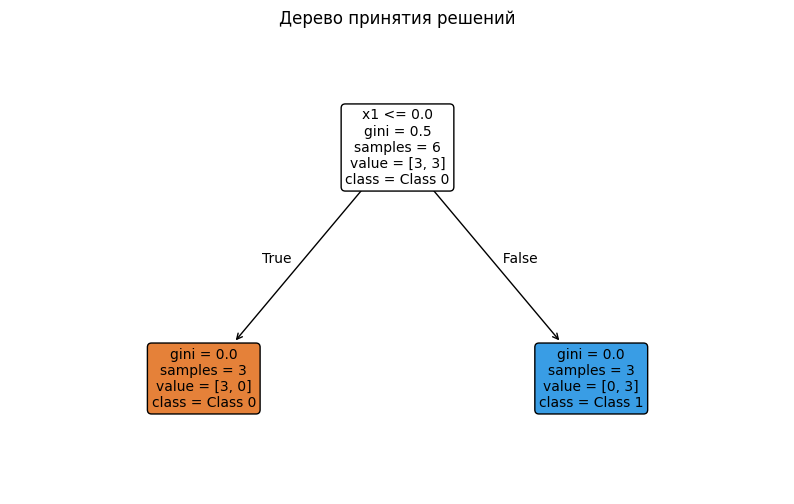

/tmp/ipykernel_65357/3150955198.py:58: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[target == cl, 0], X[target == cl, 1],


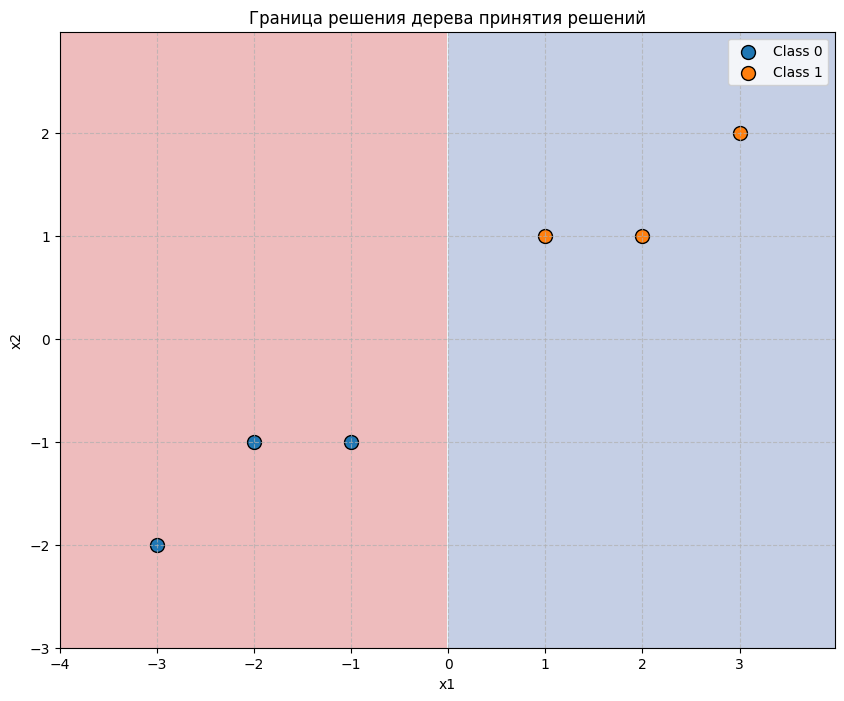


Точность модели на обучающих данных: 100.00%

Примеры предсказаний:
  Точка [-1 -1] --> класс 0 (истинный класс: 0)
  Точка [-2 -1] --> класс 0 (истинный класс: 0)
  Точка [-3 -2] --> класс 0 (истинный класс: 0)
  Точка [1 1] --> класс 1 (истинный класс: 1)
  Точка [2 1] --> класс 1 (истинный класс: 1)
  Точка [3 2] --> класс 1 (истинный класс: 1)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score


# Данные
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
target = np.array([0, 0, 0, 1, 1, 1])


# Создаем и обучаем дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, target)


# Выводим информацию о модели
print("Коэффициенты дерева решений:")
for i, feature in enumerate(['x1', 'x2']):
    print(f"  {feature}: {clf.feature_importances_[i]:.4f}")
print(f"\nГлубина дерева: {clf.get_depth()}")
print(f"Количество листьев: {clf.get_n_leaves()}")


# Визуализируем структуру дерева
plt.figure(figsize=(10, 6))
plot_tree(clf, 
          feature_names=['x1', 'x2'],
          class_names=['Class 0', 'Class 1'],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Дерево принятия решений")
plt.show()


# Визуализируем данные и границу решения
plt.figure(figsize=(10, 8))


# Создаем сетку для визуализации границы решения
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),  np.arange(y_min, y_max, 0.02))


# Предсказываем класс для каждой точки сетки
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


# Рисуем границу решения 
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)


# Рисуем обучающие точки
for i, cl in enumerate(np.unique(target)):
    plt.scatter(X[target == cl, 0], X[target == cl, 1], 
                label=f'Class {cl}', 
                edgecolor='k', 
                s=100,
                cmap=plt.cm.RdYlBu)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Граница решения дерева принятия решений')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# Оценка точности
y_pred = clf.predict(X)
accuracy = accuracy_score(target, y_pred)
print(f"\nТочность модели на обучающих данных: {accuracy:.2%}")


# Примеры предсказаний
print("\nПримеры предсказаний:")
for i, point in enumerate(X):
    prediction = clf.predict([point])[0]
    print(f"  Точка {point} --> класс {prediction} (истинный класс: {target[i]})")

# 5
Задание. Постройте модель регрессии для данных из предыдущей рабочей тетради.

Для примера можно взять потребления газа (в миллионах
галлонов) в 48 штатах США или набор данных о качестве красного вина:
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv
Постройте прогноз. Оцените точность модели.

Используемое значение random_state: 1765136795
R² на обучающих данных: 0.8453 (84.53%)
R² на тестовых данных:   -0.6414 (-64.14%)


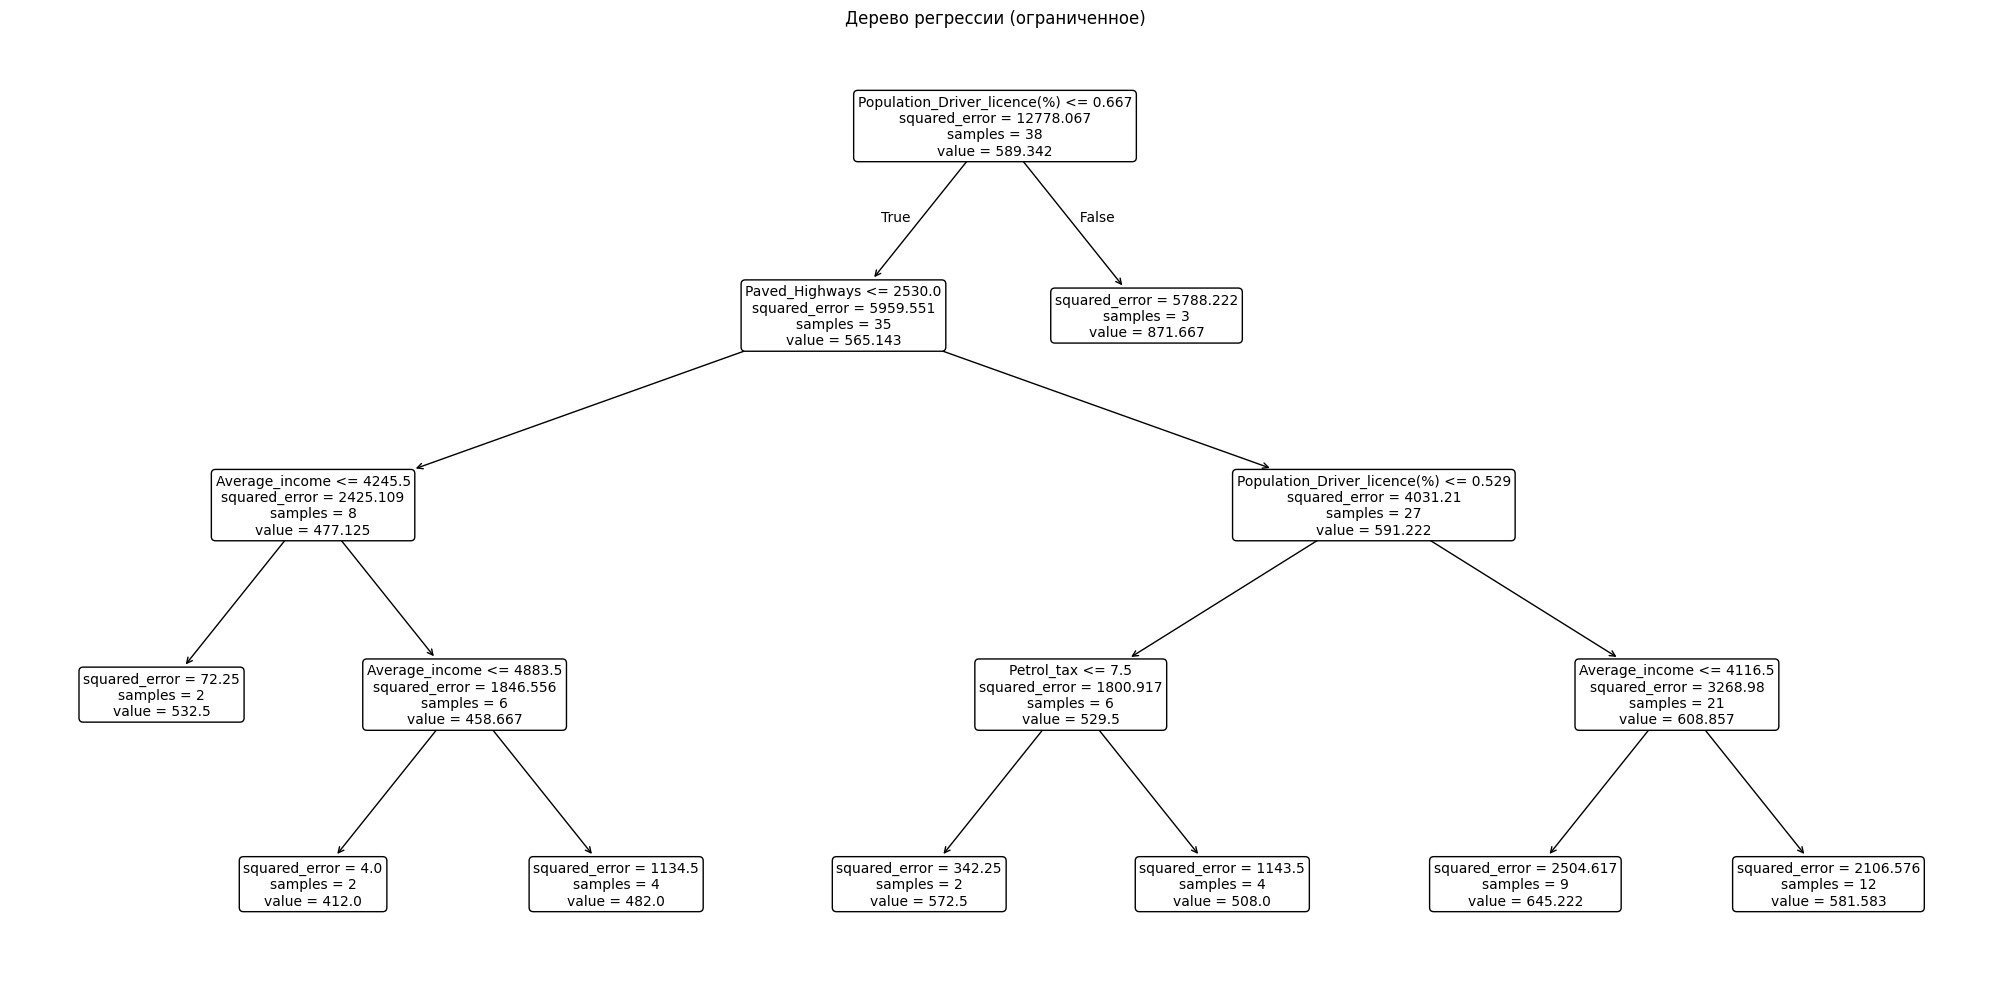

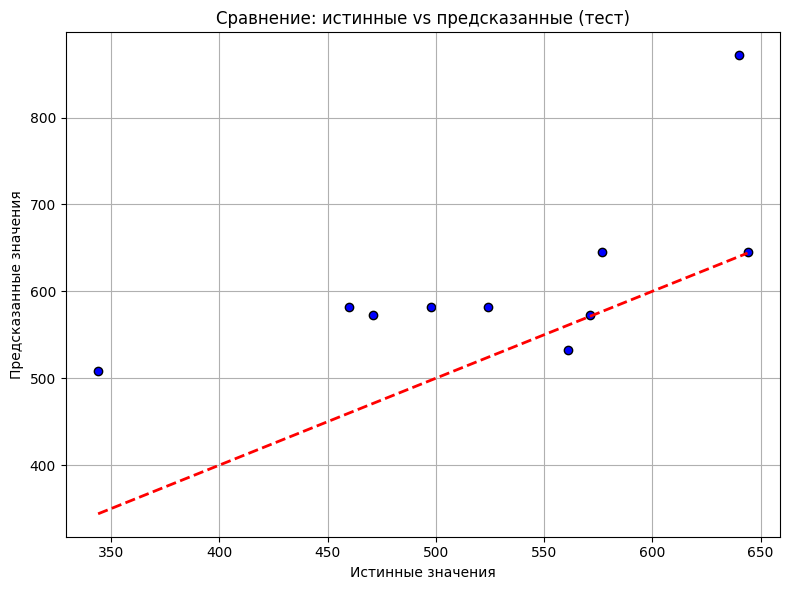

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from time import time
seed = int(time())
print(f"Используемое значение random_state: {seed}")
# === Загрузка данных ===
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataframe = pd.read_csv(url)

# === Подготовка данных ===
X = dataframe.drop('Petrol_Consumption', axis=1)
y = dataframe['Petrol_Consumption']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=seed
)

# === Обучение модели с ограничениями (против переобучения) ===
regressor = DecisionTreeRegressor(
    max_depth=4,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=seed
)
regressor.fit(X_train, y_train)

# === Оценка качества ===
train_r2 = regressor.score(X_train, y_train)
test_r2 = regressor.score(X_test, y_test)

print(f"R² на обучающих данных: {train_r2:.4f} ({train_r2:.2%})")
print(f"R² на тестовых данных:   {test_r2:.4f} ({test_r2:.2%})")

# Прогноз на тестовых данных
y_pred_test = regressor.predict(X_test)


# === Визуализация дерева ===
plt.figure(figsize=(20, 10))
plot_tree( regressor, feature_names=X.columns, filled=False, rounded=True, fontsize=10 )
plt.title("Дерево регрессии (ограниченное)")
plt.tight_layout()
plt.show()

# === График: истинные vs предсказанные (тест) ===
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', edgecolor='k', alpha=1.0)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение: истинные vs предсказанные (тест)')
plt.grid(True)
plt.tight_layout()
plt.show()

Исходный размер: (1599, 12)
После очистки: (1359, 12)
Train: 1087, Test: 272

    РЕЗУЛЬТАТЫ RANDOM FOREST (АНСАМБЛЬ ДЕРЕВЬЕВ)
MSE:  0.3886
RMSE: 0.6234
R²:   0.4207

Топ-5 важных признаков:
alcohol                 0.294036
sulphates               0.154170
volatile acidity        0.144352
total sulfur dioxide    0.066534
chlorides               0.055750

Пример (первые 10):
 Факт  Прогноз
    5     5.13
    6     5.90
    5     6.27
    8     6.77
    6     5.10
    5     5.49
    7     6.27
    4     5.02
    7     6.62
    6     5.78


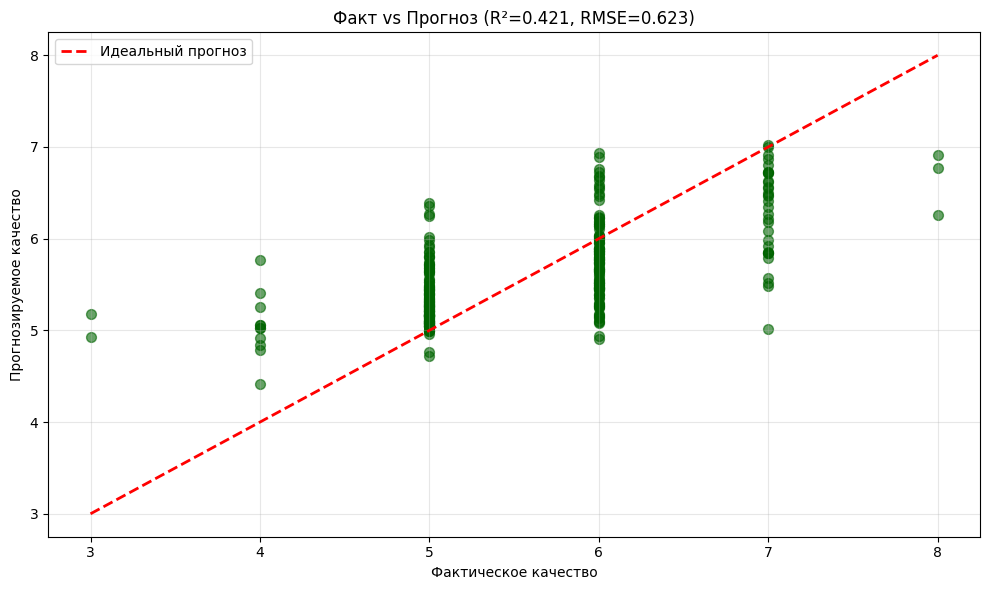

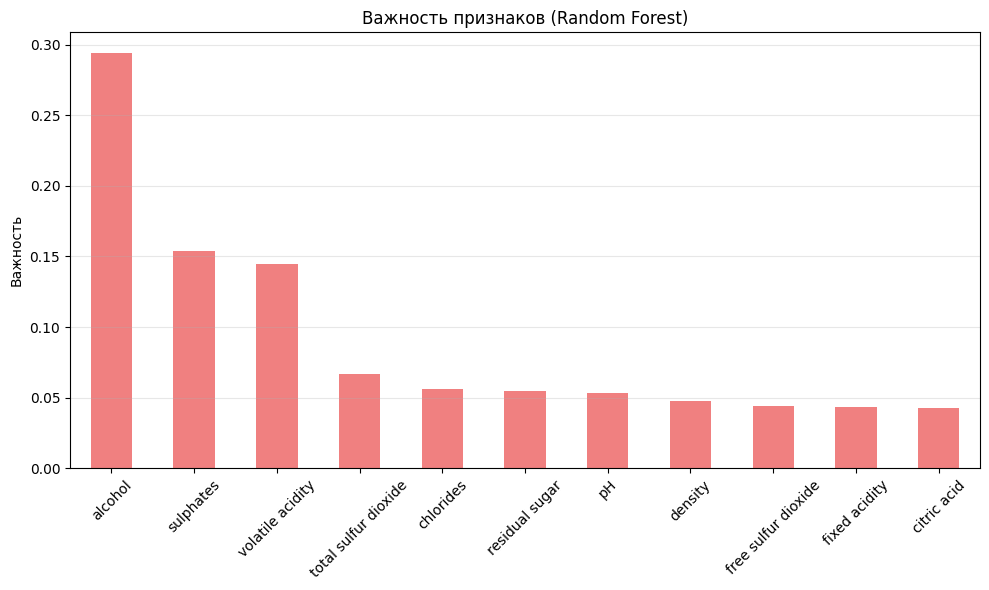

In [6]:
# -*- coding: utf-8 -*-
"""
Улучшенное прогнозирование качества красного вина
Random Forest Regressor (ансамбль деревьев) + оценка
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Загрузка данных (если нет интернета, загрузи CSV локально)
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
data = pd.read_csv(url)

print(f"Исходный размер: {data.shape}")
data = data.drop_duplicates()  # Удаляем дубликаты
print(f"После очистки: {data.shape}")

# 2. Подготовка
X = data.drop('quality', axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]}")

# 3. Модель: Random Forest (ансамбль из 100 деревьев)
model = RandomForestRegressor(
    n_estimators=100,  # Количество деревьев
    max_depth=10,      # Глубина (баланс между сложностью и обобщением)
    random_state=42
)
model.fit(X_train, y_train)

# 4. Прогноз
y_pred = model.predict(X_test)

# 5. Метрики
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n" + "="*60)
print("    РЕЗУЛЬТАТЫ RANDOM FOREST (АНСАМБЛЬ ДЕРЕВЬЕВ)")
print("="*60)
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")
print("="*60)

# 6. Важность признаков
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nТоп-5 важных признаков:")
print(importances.head().to_string())

# 7. Пример прогнозов
print("\nПример (первые 10):")
comp = pd.DataFrame({'Факт': y_test[:10], 'Прогноз': np.round(y_pred[:10], 2)})
print(comp.to_string(index=False))

# 8. График: Факт vs Прогноз (улучшенный!)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='darkgreen', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Идеальный прогноз')
plt.xlabel('Фактическое качество')
plt.ylabel('Прогнозируемое качество')
plt.title(f'Факт vs Прогноз (R²={r2:.3f}, RMSE={rmse:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 9. График важности
plt.figure(figsize=(10, 6))
importances.plot(kind='bar', color='lightcoral')
plt.title('Важность признаков (Random Forest)')
plt.ylabel('Важность')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [7]:
# РАБОЧАЯ ТЕТРАДЬ №5 — Задание 1.4 (стр. 23)
# Полное решение: Дерево решений (регрессия) — качество красного вина
# Всё в одном блоке — просто запусти и сдавай

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = [10, 6]

# 1. Загрузка данных
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
df = pd.read_csv(url)

print("Размер датасета:", df.shape)
display(df.head())

# 2. Подготовка данных
X = df.drop('quality', axis=1)
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Модель — Дерево решений (глубина 6 — оптимально для этого датасета)
model = DecisionTreeRegressor(max_depth=6, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)







# 8. Таблица сравнения (первые 20 строк)
print("\nПервые 20 прогнозов:")
comparison = pd.DataFrame({
    'Фактическое качество': y_test.values[:20],
    'Предсказанное качество': np.round(y_pred[:20], 3)
})
print(comparison.to_string(index=False))

Размер датасета: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Первые 20 прогнозов:
 Фактическое качество  Предсказанное качество
                    6                   5.540
                    5                   5.019
                    6                   5.540
                    5                   5.049
                    6                   6.031
                    5                   5.019
                    5                   5.442
                    5                   5.019
                    5                   6.085
                    6                   6.031
                    7                   7.000
                    3                   5.540
                    5                   5.540
                    5                   5.540
                    6                   5.733
                    7                   6.267
                    5                   5.480
                    7                   5.540
                    8                   6.980
                    5                   5.540


In [8]:
# 4. Метрики
print("\n" + "="*55)
print("           РЕЗУЛЬТАТЫ МОДЕЛИ (Дерево решений)")
print("="*55)
print(f"MAE  (средняя абсолютная ошибка):     {mean_absolute_error(y_test, y_pred):.4f}")
print(f"RMSE (среднеквадратичная ошибка):     {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²   (коэффициент детерминации):      {r2_score(y_test, y_pred):.4f}")
print("="*55)


           РЕЗУЛЬТАТЫ МОДЕЛИ (Дерево решений)
MAE  (средняя абсолютная ошибка):     0.4989
RMSE (среднеквадратичная ошибка):     0.6802
R²   (коэффициент детерминации):      0.2921


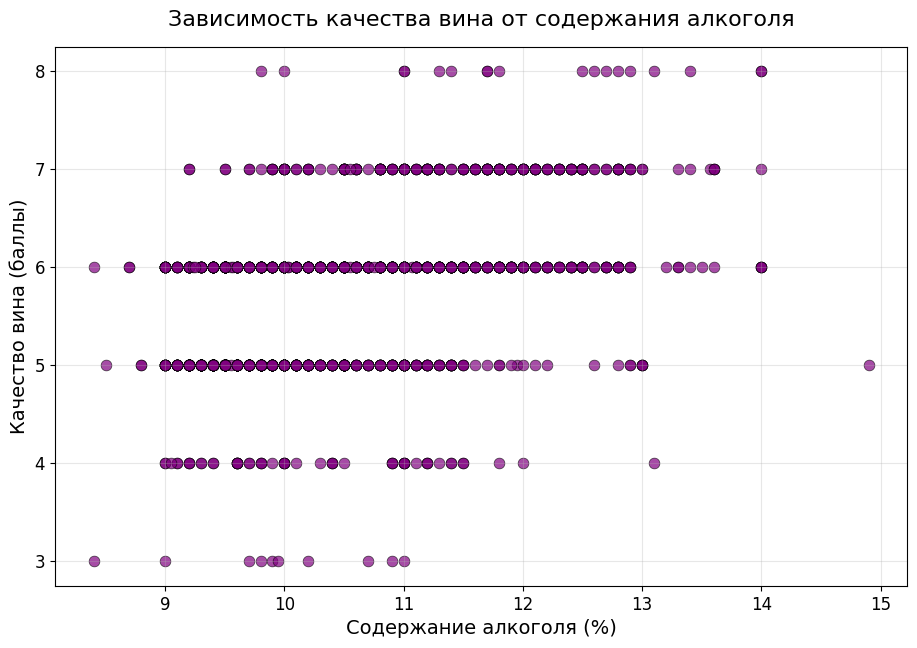

'\nВывод:\nАлкоголь — важный, но не единственный фактор, влияющий на качество. Модель должна учитывать другие признаки (как и делает дерево решений).\n'

In [9]:
# 5. ГРАФИК 1 — Алкоголь vs Качество (как в тетради)
plt.figure(figsize=(11,7))
plt.scatter(df['alcohol'], df['quality'], alpha=0.7, color='purple', s=60, edgecolor='k', linewidth=0.5)
plt.title('Зависимость качества вина от содержания алкоголя', fontsize=16, pad=15)
plt.xlabel('Содержание алкоголя (%)', fontsize=14)
plt.ylabel('Качество вина (баллы)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()


'''
Вывод:
Алкоголь — важный, но не единственный фактор, влияющий на качество. Модель должна учитывать другие признаки (как и делает дерево решений).
'''


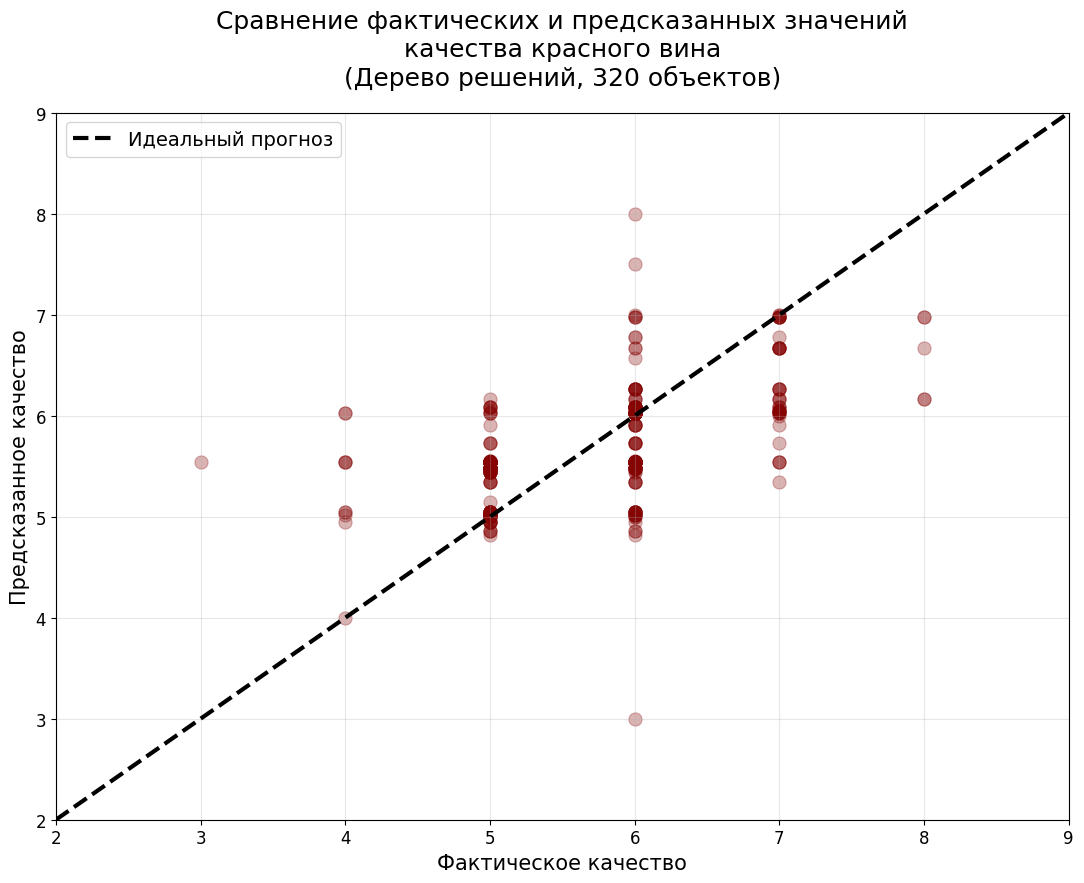

In [10]:
# 6. ГРАФИК 2 — Фактическое vs Предсказанное (320 точек, красиво!)

#start_index = 0
start_index = y_test.min() - 1
#end_index = 0
end_index = y_test.max() + 1

plt.figure(figsize=(11,9))
plt.scatter(y_test, y_pred, alpha=0.3, color="#86040436", s=90, linewidth=0.8)
plt.plot([start_index,end_index],[start_index,end_index], 'k--', linewidth=3, label='Идеальный прогноз')
plt.title('Сравнение фактических и предсказанных значений\nкачества красного вина\n(Дерево решений, 320 объектов)', 
          fontsize=18, pad=20)
plt.xlabel('Фактическое качество', fontsize=15)
plt.ylabel('Предсказанное качество', fontsize=15)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=14)
plt.xlim(start_index, end_index)
plt.ylim(start_index,end_index)
plt.tight_layout()
plt.show()

In [ ]:
# 7. ГРАФИК 3 — Само дерево (глубина 3 — как на стр. 20–21 тетради)
plt.figure(figsize=(20,14))
plot_tree(model, feature_names=X.columns, fontsize=10,max_depth=3)
plt.title("Дерево решений для предсказания качества красного вина (глубина 3)", fontsize=20, pad=20)
plt.show()

plt.figure(figsize=(20,5))
plot_tree(model, feature_names=X.columns, fontsize=1)
plt.title("Дерево решений для предсказания качества красного вина полное", fontsize=10, pad=20)
plt.show()